# Big Data 2 Presentation Codes - Group 13


Team Members: <br>
1. Adam Kushairi (01916114) 
2. Ahmad Qadi (01968791)
3. Alya Binti T Mohd (01991819)
4. Manuel Cabral (01960028)
4. Xiangyi Yin (00941583)

# Importing Libraries

In [24]:
import pickle
import arrow
import time
import numpy as np 
import pandas as pd 
import seaborn as sn 
from matplotlib import cm
import matplotlib.pyplot as plt
from sklearn import linear_model
import prettytable
from sklearn.metrics import r2_score
from keras.optimizers import RMSprop
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegressionCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import TimeSeriesSplit
from sklearn.linear_model import LassoCV
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

seed_value = 1
import random
random.seed(seed_value)
np.random.seed(seed_value)
import tensorflow as tf
tf.random.set_seed(seed_value)




import warnings
warnings.filterwarnings("ignore")

# -------------------------------------------------------------------------------------------

# Classification Models

In [10]:
ada = pd.read_csv('Clean_ADA.csv').iloc[:, 1:]
ada_returns = pd.read_csv('ada_return.csv').iloc[:, 1:]
ada_returns = np.where(ada_returns['0'] < -0.09, "1", np.where(ada_returns['0'] >  0.08, "3", "2"))

In [239]:
ada.head()

,Open,High,Low,Close,HL/O,Volume,Quote asset volume,Number of trades,Taker buy base asset volume,Taker buy quote asset volumne,...,BTC Taker buy base asset volume,BTC Taker buy quote asset volumne,BTC Open Ratio,BTC High Ratio,BTC Low Ratio,BTC Close Ratio,BTC HL/O,OHLC,BTC OHLC,Delta T
0,2.282852,2.562734,2.212629,2.282406,24.819483,0.995053,4.294496,3.389996,0.357925,2.383868,...,-0.392947,-0.232649,-0.984746,-0.959240,0.010111,-0.004484,-0.495216,2.335417,0.935985,-0.006947
1,2.282575,2.470905,2.249791,2.284203,15.754980,1.121216,4.668924,4.654881,0.293500,2.191511,...,-0.333239,-0.169698,-0.005135,-0.119600,-0.838953,-1.045270,0.107837,2.322039,0.931695,-0.006947
2,2.283958,2.296485,2.224692,2.231937,5.230057,0.588997,3.091531,2.399424,-0.054835,1.171159,...,-0.031545,0.150811,-1.047993,-0.519800,-0.593116,-0.468097,0.201372,2.259333,0.926137,-0.006947
3,2.231832,2.236782,2.196960,2.226268,3.028608,0.468311,2.683271,3.572871,0.408048,2.440763,...,-0.577746,-0.430200,-0.468763,-0.307955,0.078704,0.230459,-0.100163,2.223003,0.925199,-0.006947
4,2.226163,2.245055,2.209717,2.227789,2.719729,0.206239,1.954198,1.523149,0.038041,1.416304,...,-0.015550,0.165895,0.142732,-0.317046,-0.496846,0.133030,0.067042,2.227220,0.924126,-0.006947


In [11]:
X_train, X_test, y_train, y_test = train_test_split(ada, ada_returns, test_size=0.5, random_state = 0)

# 1- Lasso


In [12]:
lasso = LogisticRegressionCV(cv = 5, penalty='l1', solver='saga', verbose = 1, n_jobs = -1)
lasso_model = lasso.fit(X_train, y_train)
lasso_model

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 32 concurrent workers.


max_iter reached after 23 seconds
max_iter reached after 23 seconds
max_iter reached after 23 seconds
max_iter reached after 23 seconds
max_iter reached after 23 seconds
max_iter reached after 23 seconds
max_iter reached after 23 seconds
max_iter reached after 23 seconds
max_iter reached after 23 seconds
max_iter reached after 23 seconds
max_iter reached after 25 seconds
max_iter reached after 25 seconds
max_iter reached after 25 seconds
max_iter reached after 26 seconds
max_iter reached after 26 seconds
max_iter reached after 26 seconds
max_iter reached after 26 seconds
max_iter reached after 27 seconds
max_iter reached after 26 seconds
max_iter reached after 26 seconds
max_iter reached after 27 seconds
max_iter reached after 27 seconds
max_iter reached after 26 seconds
max_iter reached after 26 seconds
max_iter reached after 26 seconds
max_iter reached after 25 seconds
max_iter reached after 26 seconds
max_iter reached after 27 seconds
max_iter reached after 27 seconds
max_iter reach

[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  4.3min remaining:  6.5min


max_iter reached after 28 seconds
max_iter reached after 27 seconds
max_iter reached after 28 seconds


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  4.3min finished


LogisticRegressionCV(cv=5, n_jobs=-1, penalty='l1', solver='saga', verbose=1)

In [13]:
y_pred_test = lasso_model.predict(X_test)
lasso_test_rs = r2_score(y_test,y_pred_test)
scores = lasso_model.score(X_test, y_test)

print('Accuracy :' , scores*100)
print('R Squared : ', lasso_test_rs)

Accuracy : 41.86857723628242
R Squared :  -0.6576600146631615


## 2- Neural Network

In [14]:
X_train = np.array(X_train, dtype=np.float32)
y_train = np.array(y_train, dtype=np.float32)
X_test = np.array(X_test, dtype=np.float32)
y_test = np.array(y_test, dtype=np.float32)

print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(159393, 92) (159393,)
(159394, 92) (159394,)


In [15]:
input_n = X_train.shape[1] + 1
output_n = 4
hidden_layer = 256
hidden_layer2 = hidden_layer/2
print('input neurons: ', input_n)
print('output neurons: ', output_n)
print('hidden layer: ', hidden_layer)

input neurons:  93
output neurons:  4
hidden layer:  256


In [16]:
model = Sequential()
model.add(Dropout(0.2))
model.add(Dense(input_n, activation='relu'))
model.add(Dense(hidden_layer, activation='relu'))
model.add(Dense(hidden_layer2, activation='relu'))
model.add(Dense(output_n, activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [17]:
history = model.fit(X_train, y_train, epochs=20, batch_size=50, validation_split=0.33)
history

Epoch 1/20
2136/2136 [==============================] - 2s 960us/step - loss: 1.0823 - accuracy: 0.4033 - val_loss: 1.0622 - val_accuracy: 0.4205
Epoch 2/20
2136/2136 [==============================] - 2s 875us/step - loss: 1.0653 - accuracy: 0.4147 - val_loss: 1.0599 - val_accuracy: 0.4191
Epoch 3/20
2136/2136 [==============================] - 2s 887us/step - loss: 1.0626 - accuracy: 0.4167 - val_loss: 1.0592 - val_accuracy: 0.4186
Epoch 4/20
2136/2136 [==============================] - 2s 881us/step - loss: 1.0607 - accuracy: 0.4207 - val_loss: 1.0594 - val_accuracy: 0.4205
Epoch 5/20
2136/2136 [==============================] - 2s 871us/step - loss: 1.0596 - accuracy: 0.4212 - val_loss: 1.0582 - val_accuracy: 0.4230
Epoch 6/20
2136/2136 [==============================] - 2s 881us/step - loss: 1.0585 - accuracy: 0.4246 - val_loss: 1.0582 - val_accuracy: 0.4231
Epoch 7/20
2136/2136 [==============================] - 2s 871us/step - loss: 1.0564 - accuracy: 0.4264 - val_loss: 1.0570 -

In [18]:
scores = model.evaluate(X_test, y_test)
print("Accuracy: %.2f%%" % (scores[1]*100))

4982/4982 [==============================] - 3s 505us/step - loss: 1.0662 - accuracy: 0.4194
Accuracy: 41.94%


In [20]:
y_pred = model.predict(X_test)

[Text(0, 0.5, 'Low'), Text(0, 1.5, 'Mid'), Text(0, 2.5, 'High')]

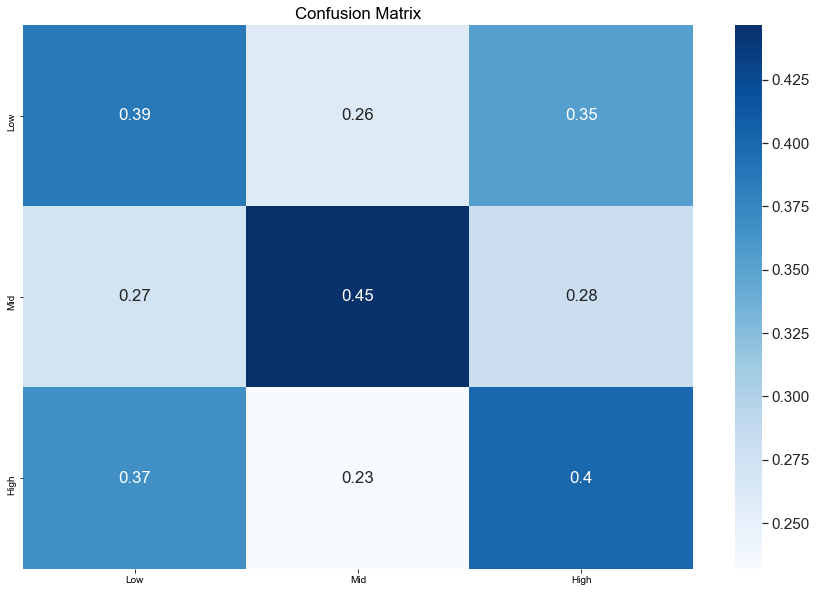

In [21]:
from sklearn.metrics import confusion_matrix
import seaborn as sn

labels = ['Low','Mid','High'] 
conf_mat = confusion_matrix(np.argmax(y_pred, axis = 1),y_test)
conf_mat = conf_mat.astype('float') / conf_mat.sum(axis=1)[:, np.newaxis]
df_cm = pd.DataFrame(conf_mat, range(3), range(3))
df_cm

fig, ax = plt.subplots(figsize=(15,10))
sn.set(font_scale=1.4)
sn.heatmap(df_cm, annot=True, cmap="Blues", ax=ax) #annot=True to annotate cells, ftm='g' to disable scientific notation

ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

### Sensitivity Analysis


In [25]:
delta_accuracy_list = []
accuracy_list = []
for column_index in range(X_test.shape[1]):
    print(column_index)
    columns_test = X_test.copy()
    columns_test[:, column_index] = 0
    
    score = model.evaluate(columns_test, y_test)
    print("Accuracy: %.2f%%" % (score[1]*100))
    
    delta_accuracy = scores[1]*100 - score[1]*100
    delta_accuracy_list.append(delta_accuracy)
    accuracy_list.append(score[1]*100)

0
4982/4982 [==============================] - 3s 511us/step - loss: 1.0659 - accuracy: 0.4194
Accuracy: 41.94%
1
4982/4982 [==============================] - 3s 526us/step - loss: 1.0658 - accuracy: 0.4193
Accuracy: 41.93%
2
4982/4982 [==============================] - 3s 519us/step - loss: 1.0659 - accuracy: 0.4193
Accuracy: 41.93%
3
4982/4982 [==============================] - 2s 464us/step - loss: 1.0659 - accuracy: 0.4191
Accuracy: 41.91%
4
4982/4982 [==============================] - 3s 511us/step - loss: 1.0691 - accuracy: 0.4143
Accuracy: 41.43%
5
4982/4982 [==============================] - 3s 506us/step - loss: 1.0662 - accuracy: 0.4196
Accuracy: 41.96%
6
4982/4982 [==============================] - 3s 520us/step - loss: 1.0661 - accuracy: 0.4187
Accuracy: 41.87%
7
4982/4982 [==============================] - 3s 509us/step - loss: 1.0665 - accuracy: 0.4174
Accuracy: 41.74%
8
4982/4982 [==============================] - 2s 477us/step - loss: 1.0662 - accuracy: 0.4193
Accuracy:

4982/4982 [==============================] - 2s 446us/step - loss: 1.0657 - accuracy: 0.4194
Accuracy: 41.94%
59
4982/4982 [==============================] - 2s 497us/step - loss: 1.0660 - accuracy: 0.4195
Accuracy: 41.95%
60
4982/4982 [==============================] - 2s 449us/step - loss: 1.0659 - accuracy: 0.4197
Accuracy: 41.97%
61
4982/4982 [==============================] - 2s 446us/step - loss: 1.0661 - accuracy: 0.4199
Accuracy: 41.99%
62
4982/4982 [==============================] - 3s 521us/step - loss: 1.0661 - accuracy: 0.4197
Accuracy: 41.97%
63
4982/4982 [==============================] - 2s 454us/step - loss: 1.0661 - accuracy: 0.4199
Accuracy: 41.99%
64
4982/4982 [==============================] - 2s 444us/step - loss: 1.0660 - accuracy: 0.4194
Accuracy: 41.94%
65
4982/4982 [==============================] - 3s 522us/step - loss: 1.0660 - accuracy: 0.4198
Accuracy: 41.98%
66
4982/4982 [==============================] - 3s 532us/step - loss: 1.0660 - accuracy: 0.4199
Acc

In [26]:
delta_accuracy_df = pd.DataFrame(np.array([list(ada.columns.values), [round(elem, 5) for elem in delta_accuracy_list]]).transpose(), columns = ['Predictor', 'Delta Accurancy'])
delta_accuracy_df['Delta Accurancy'] = np.float32(delta_accuracy_df['Delta Accurancy'])
delta_accuracy_df = delta_accuracy_df.sort_values(['Delta Accurancy'], ascending=False).reset_index(drop=True)

delta_accuracy_df.iloc[:10, :]

,Predictor,Delta Accurancy
0,HL/O,0.50755
1,Number of trades,0.20390
2,BTC HL/O,0.15810
3,BTC Close Ratio,0.15559
4,55m,0.11857
5,Close Ratio,0.11732
6,Week4,0.07278
7,Quote asset volume,0.07027
8,Year,0.05835
9,BTC Taker buy base asset volume,0.05458


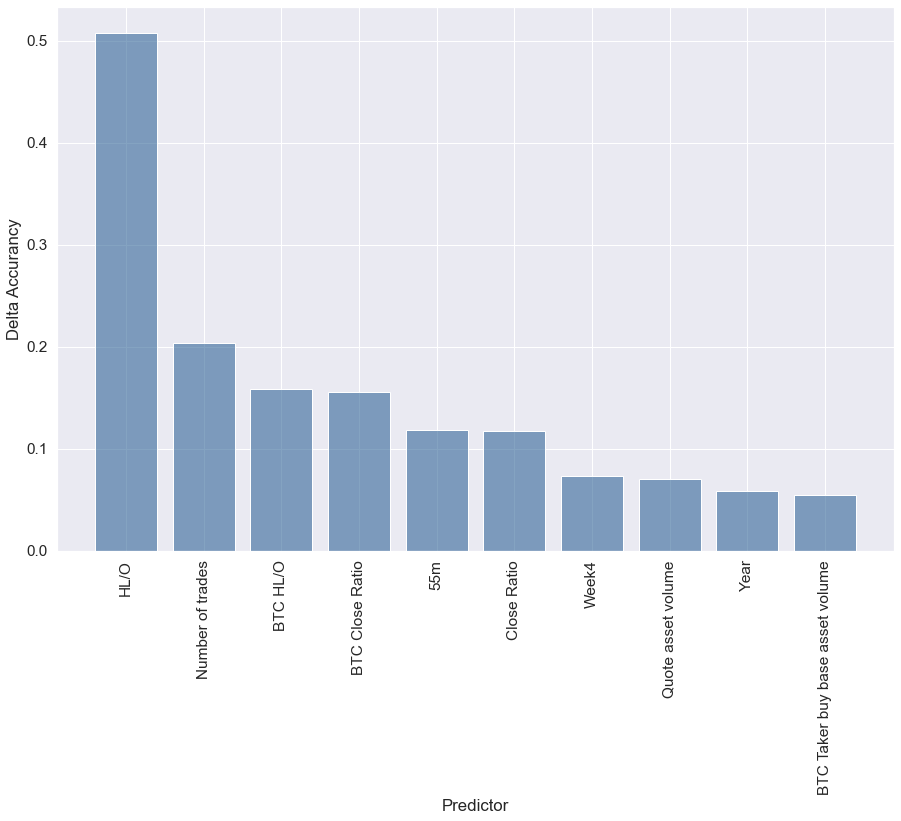

In [27]:
plt.figure(figsize=(15, 10))
plt.rcParams.update({'font.size': 16})
plt.bar(delta_accuracy_df.iloc[:10, :]['Predictor'], 
        delta_accuracy_df.iloc[:10, :]['Delta Accurancy'],
       color=(0.2, 0.4, 0.6, 0.6))

plt.xlabel('Predictor')
plt.ylabel('Delta Accurancy')
plt.xticks(delta_accuracy_df.iloc[:10, :]['Predictor'])
plt.xticks(rotation=90)
plt.grid(True)

plt.show()

## 3- LSTM

In [133]:
import math

training_data_size = math.ceil(len(ada_returns)*0.5)
training_data_size

159394

In [134]:
X_train2 = ada[0:training_data_size]
y_train2 = ada_returns[0:training_data_size]

In [135]:
X_test2 = ada[training_data_size:]
y_test2 = ada_returns[training_data_size:]

In [137]:
window_size = 11
X_train_lags = []
y_train_lags = []
for i in range(window_size, len(X_train2)):
    X_train_lags.append(X_train2[i-window_size:i])
    y_train_lags.append(y_train2[i-1])

In [138]:
X_train_lags = np.array(X_train_lags)

In [139]:
y_train_lags = pd.get_dummies(y_train_lags).values
y_train_lags = np.array(y_train_lags)
print('Shape of label tensor:', y_train_lags.shape)

Shape of label tensor: (159383, 3)


In [140]:
epochs, batch_size = 10, 100
n_timesteps, n_features, n_outputs = X_train_lags.shape[1], X_train_lags.shape[2], y_train_lags.shape[1]
print(n_timesteps, n_features, n_outputs)
model = Sequential()
model.add(LSTM(100, input_shape=(n_timesteps,n_features)))
model.add(Dropout(0.2))
model.add(Dense(50, activation='relu'))
model.add(Dense(n_outputs, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

11 92 3


In [141]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (None, 100)               77200     
_________________________________________________________________
dropout_5 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 50)                5050      
_________________________________________________________________
dense_13 (Dense)             (None, 3)                 153       
Total params: 82,403
Trainable params: 82,403
Non-trainable params: 0
_________________________________________________________________


In [142]:
model.fit(X_train_lags, y_train_lags, epochs=epochs, batch_size=batch_size, validation_split=0.33)

Epoch 1/10
1068/1068 [==============================] - 7s 6ms/step - loss: 1.0605 - accuracy: 0.4209 - val_loss: 1.0789 - val_accuracy: 0.4159
Epoch 2/10
1068/1068 [==============================] - 7s 6ms/step - loss: 1.0493 - accuracy: 0.4381 - val_loss: 1.0828 - val_accuracy: 0.4177
Epoch 3/10
1068/1068 [==============================] - 7s 6ms/step - loss: 1.0450 - accuracy: 0.4453 - val_loss: 1.0854 - val_accuracy: 0.4197
Epoch 4/10
1068/1068 [==============================] - 6s 6ms/step - loss: 1.0401 - accuracy: 0.4527 - val_loss: 1.0877 - val_accuracy: 0.4205
Epoch 5/10
1068/1068 [==============================] - 7s 6ms/step - loss: 1.0350 - accuracy: 0.4600 - val_loss: 1.0902 - val_accuracy: 0.4228
Epoch 6/10
1068/1068 [==============================] - 7s 6ms/step - loss: 1.0285 - accuracy: 0.4688 - val_loss: 1.1030 - val_accuracy: 0.4223
Epoch 7/10
1068/1068 [==============================] - 7s 6ms/step - loss: 1.0210 - accuracy: 0.4767 - val_loss: 1.1134 - val_accuracy:

In [143]:
#test set

X_test_lags = []
y_test_lags = []
for i in range(window_size, len(X_test2)):
    X_test_lags.append(X_test2[i-window_size:i])
    y_test_lags.append(y_test2[i-1])

In [144]:
X_test_lags = np.array(X_test_lags)
y_test_lags = pd.get_dummies(y_test_lags).values
y_test_lags = np.array(y_test_lags)
print('Shape of label tensor:', y_test_lags.shape)

Shape of label tensor: (159382, 3)


In [145]:
model.predict(X_test_lags)

array([[0.28734922, 0.57271415, 0.13993669],
       [0.23154879, 0.6629941 , 0.10545717],
       [0.25544038, 0.5854915 , 0.15906812],
       ...,
       [0.44867635, 0.19735764, 0.35396606],
       [0.4407935 , 0.22268693, 0.33651957],
       [0.46706593, 0.23874141, 0.2941926 ]], dtype=float32)

In [146]:
scores = model.evaluate(X_test_lags, y_test_lags)
print("Accuracy: %.2f%%" % (scores[1]*100))

4981/4981 [==============================] - 6s 1ms/step - loss: 1.1728 - accuracy: 0.3985
Accuracy: 39.85%


In [147]:
y_pred = model.predict(X_test_lags)

In [148]:
labels = ['High','Low','Mid'] 
print(y_pred)

[[0.28734922 0.57271415 0.13993669]
 [0.23154879 0.6629941  0.10545717]
 [0.25544038 0.5854915  0.15906812]
 ...
 [0.44867635 0.19735764 0.35396606]
 [0.4407935  0.22268693 0.33651957]
 [0.46706593 0.23874141 0.2941926 ]]


In [149]:
y_pred_label = np.argmax(y_pred, axis = 1)

In [150]:
y_test_label = np.argmax(y_test_lags, axis = 1)

In [151]:
count = 0
for i in range(len(y_pred_label)):
    if y_pred_label[i] == y_test_label[i]:
        count += 1
count / len(y_pred_label)

0.39847034169479617

In [152]:
conf_mat = confusion_matrix(np.argmax(y_pred, axis = 1),np.argmax(y_test_lags, axis = 1))

In [153]:
conf_mat = conf_mat.astype('float') / conf_mat.sum(axis=1)[:, np.newaxis]

In [154]:
conf_mat

array([[0.36205073, 0.2648275 , 0.37312177],
       [0.25731385, 0.46915906, 0.2735271 ],
       [0.35350793, 0.2461242 , 0.40036787]])

In [155]:
df_cm = pd.DataFrame(conf_mat, range(3), range(3))
df_cm

,0,1,2
0,0.362051,0.264828,0.373122
1,0.257314,0.469159,0.273527
2,0.353508,0.246124,0.400368


[Text(0, 0.5, 'High'), Text(0, 1.5, 'Low'), Text(0, 2.5, 'Mid')]

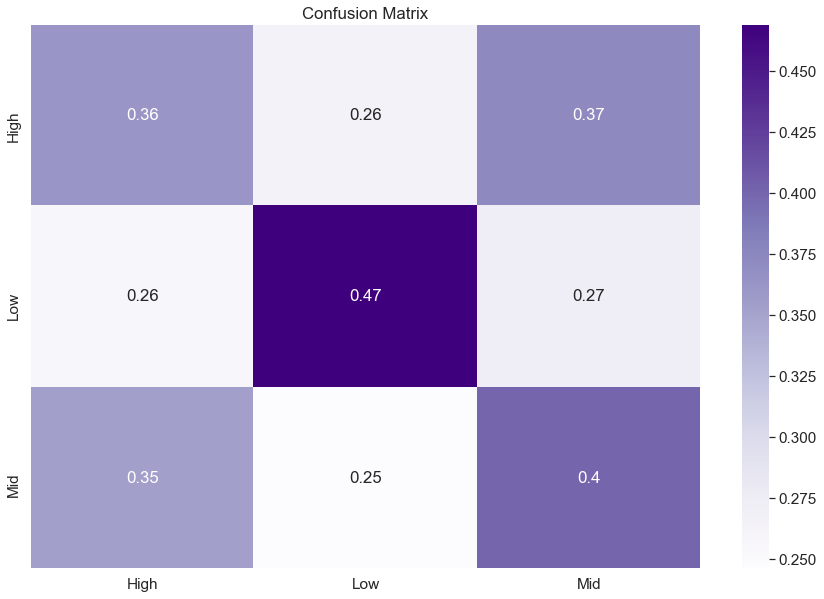

In [156]:
fig, ax = plt.subplots(figsize=(15,10))
sn.set(font_scale=1.4)
sn.heatmap(df_cm, annot=True, cmap="Purples", ax=ax) #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
# ax.set_xlabel('Predicted labels')
# ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

### Sensitivity Analysis


In [168]:
X_test_lags.shape

(159382, 11, 92)

In [171]:
delta_accuracy_list = []
accuracy_list = []
for column_index in range(X_test_lags.shape[2]):
    print(column_index)
    columns_test = X_test_lags.copy()
    columns_test[:, :, column_index] = 0
    
    score = model.evaluate(columns_test, y_test_lags)
    print("Accuracy: %.2f%%" % (score[1]*100))
    
    delta_accuracy = scores[1]*100 - score[1]*100
    delta_accuracy_list.append(delta_accuracy)
    accuracy_list.append(score[1]*100)

0
4981/4981 [==============================] - 6s 1ms/step - loss: 1.1786 - accuracy: 0.3985
Accuracy: 39.85%
1
4981/4981 [==============================] - 6s 1ms/step - loss: 1.1765 - accuracy: 0.3987
Accuracy: 39.87%
2
4981/4981 [==============================] - 6s 1ms/step - loss: 1.1735 - accuracy: 0.3976
Accuracy: 39.76%
3
4981/4981 [==============================] - 6s 1ms/step - loss: 1.1706 - accuracy: 0.3982
Accuracy: 39.82%
4
4981/4981 [==============================] - 6s 1ms/step - loss: 1.1798 - accuracy: 0.3855
Accuracy: 38.55%
5
4981/4981 [==============================] - 6s 1ms/step - loss: 1.1689 - accuracy: 0.3977
Accuracy: 39.77%
6
4981/4981 [==============================] - 6s 1ms/step - loss: 1.1680 - accuracy: 0.3984: 0s - loss: 1.1699 - 
Accuracy: 39.84%
7
4981/4981 [==============================] - 6s 1ms/step - loss: 1.1743 - accuracy: 0.3943
Accuracy: 39.43%
8
4981/4981 [==============================] - 6s 1ms/step - loss: 1.1763 - accuracy: 0.3977
Accur

4981/4981 [==============================] - 6s 1ms/step - loss: 1.1746 - accuracy: 0.3977
Accuracy: 39.77%
74
4981/4981 [==============================] - 6s 1ms/step - loss: 1.1746 - accuracy: 0.3963
Accuracy: 39.63%
75
4981/4981 [==============================] - 6s 1ms/step - loss: 1.1692 - accuracy: 0.3979
Accuracy: 39.79%
76
4981/4981 [==============================] - 6s 1ms/step - loss: 1.1757 - accuracy: 0.3980
Accuracy: 39.80%
77
4981/4981 [==============================] - 6s 1ms/step - loss: 1.1745 - accuracy: 0.3981
Accuracy: 39.81%
78
4981/4981 [==============================] - 6s 1ms/step - loss: 1.1843 - accuracy: 0.3976
Accuracy: 39.76%
79
4981/4981 [==============================] - 6s 1ms/step - loss: 1.1649 - accuracy: 0.3998
Accuracy: 39.98%
80
4981/4981 [==============================] - 6s 1ms/step - loss: 1.1517 - accuracy: 0.3997
Accuracy: 39.97%
81
4981/4981 [==============================] - 6s 1ms/step - loss: 1.1438 - accuracy: 0.4034
Accuracy: 40.34%
82
4

In [172]:
delta_accuracy_df = pd.DataFrame(np.array([list(ada.columns.values), [round(elem, 5) for elem in delta_accuracy_list]]).transpose(), columns = ['Predictor', 'Delta Accurancy'])
delta_accuracy_df['Delta Accurancy'] = np.float32(delta_accuracy_df['Delta Accurancy'])
delta_accuracy_df = delta_accuracy_df.sort_values(['Delta Accurancy'], ascending=False).reset_index(drop=True)


In [173]:
delta_accuracy_df.iloc[:10, :]

,Predictor,Delta Accurancy
0,HL/O,1.30190
1,Number of trades,0.41786
2,Close Ratio,0.22022
3,BTC HL/O,0.21834
4,Taker buy quote asset volumne,0.17442
5,BTC Close,0.09035
6,Low,0.08470
7,Volume,0.08157
8,Low Ratio,0.07968
9,Taker buy base asset volume,0.07906


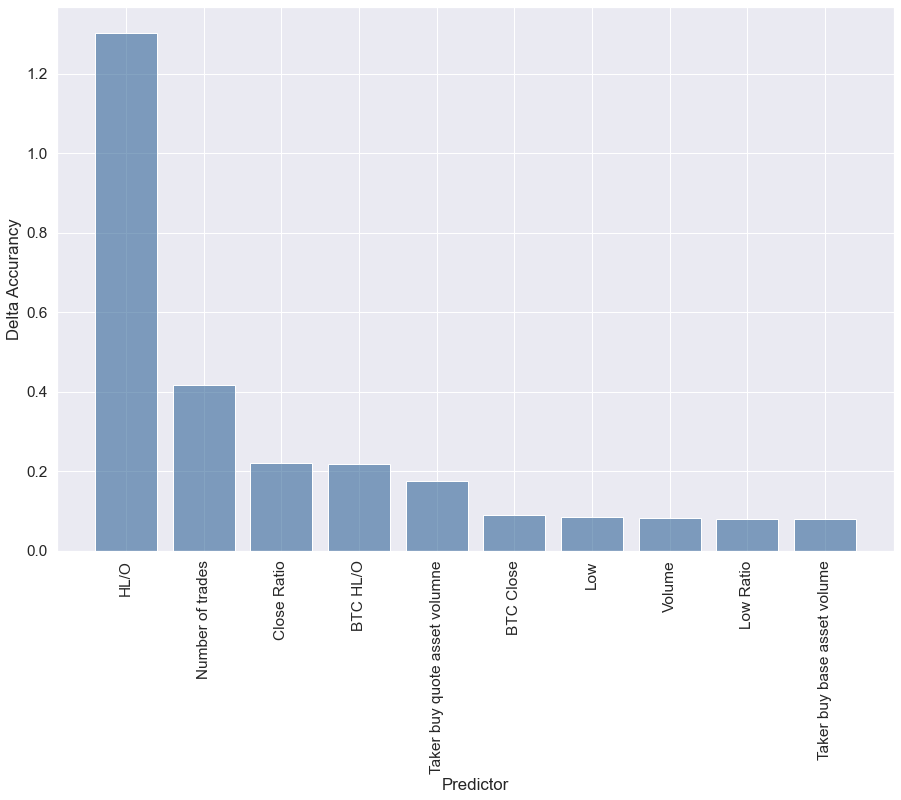

In [174]:
plt.figure(figsize=(15, 10))
plt.rcParams.update({'font.size': 16})
plt.bar(delta_accuracy_df.iloc[:10, :]['Predictor'], 
        delta_accuracy_df.iloc[:10, :]['Delta Accurancy'],
       color=(0.2, 0.4, 0.6, 0.6))

plt.xlabel('Predictor')
plt.ylabel('Delta Accurancy')
plt.xticks(delta_accuracy_df.iloc[:10, :]['Predictor'])
plt.xticks(rotation=90)
plt.grid(True)

plt.show()

# -------------------------------------------------------------------------------------------

# Regression Models

In [257]:
seed_value = 1
import random
random.seed(seed_value)
np.random.seed(seed_value)
import tensorflow as tf
tf.random.set_seed(seed_value)

In [258]:
ada_return = pd.read_csv('ada_return.csv')
ada_return.columns = ['index','return']
ada_return = ada_return.drop('index', axis = 1)

ada_btc = pd.read_csv('Clean_ADA.csv')
ada_btc = ada_btc.drop(ada_btc.columns[0], axis=1)

 

In [259]:
X=np.array(ada_btc)
y=np.array(ada_return)
print(X.shape)
print(y.shape)

(318787, 92)
(318787, 1)


In [260]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

## 1- Lasso


In [261]:
lasso_alphas = np.linspace(0, 0.2, 21)
cv = 5

lasso = LassoCV(alphas = lasso_alphas, cv = cv)
lasso_model = lasso.fit(X_train, y_train)
lasso_model

LassoCV(alphas=array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 ]),
        cv=5)

In [262]:
y_pred_test= lasso_model.predict(X_test)
MAE = mean_absolute_error(y_test , y_pred_test)
MSE = mean_squared_error(y_test , y_pred_test)
R2 = r2_score(y_test,y_pred_test)
print('Mean absolute error: ', MAE)
print('Mean squared error: ', MSE)
print('R Squared : ', R2)

Mean absolute error:  0.2292843365333256
Mean squared error:  0.13991828008092672
R Squared :  -3.878590237094137e-05


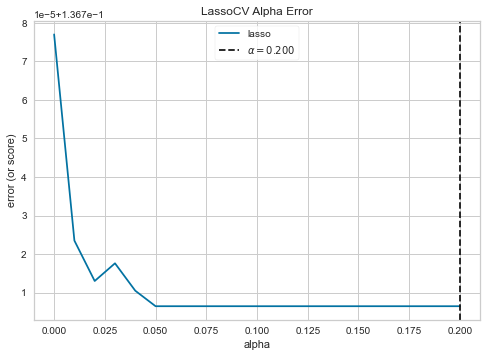

<AxesSubplot:title={'center':'LassoCV Alpha Error'}, xlabel='alpha', ylabel='error (or score)'>

In [263]:
from yellowbrick.regressor import AlphaSelection

visualizer = AlphaSelection(lasso_model)
visualizer.fit(X_train, y_train) 
visualizer.show()

Note: The model is predicting exclusively a constant function, which in the context of the problem corresponds to, roughly the historical 5 minute growth of Cardano's price. Therefore, an increase in alpha will lead to the exact same results. 

## 2- Neural Network


### One Hidden Layer


In [71]:
seed_value = 1
import random
random.seed(seed_value)
np.random.seed(seed_value)
import tensorflow as tf
tf.random.set_seed(seed_value)

In [72]:
nn_model = MLPRegressor(verbose=True, hidden_layer_sizes=(32))
nn_model= nn_model.fit(X_train , y_train)
nn_model

Iteration 1, loss = 0.36927691
Iteration 2, loss = 0.08690360
Iteration 3, loss = 0.07909676
Iteration 4, loss = 0.07599664
Iteration 5, loss = 0.08445206
Iteration 6, loss = 0.07160099
Iteration 7, loss = 0.07212096
Iteration 8, loss = 0.07176343
Iteration 9, loss = 0.07456649
Iteration 10, loss = 0.07084258
Iteration 11, loss = 0.07134592
Iteration 12, loss = 0.06907193
Iteration 13, loss = 0.06915058
Iteration 14, loss = 0.06825660
Iteration 15, loss = 0.06864844
Iteration 16, loss = 0.06811724
Iteration 17, loss = 0.06766533
Iteration 18, loss = 0.06752661
Iteration 19, loss = 0.06750694
Iteration 20, loss = 0.06741261
Iteration 21, loss = 0.06734476
Iteration 22, loss = 0.06733815
Iteration 23, loss = 0.06722018
Iteration 24, loss = 0.06709032
Iteration 25, loss = 0.06702121
Iteration 26, loss = 0.06704554
Iteration 27, loss = 0.06698337
Iteration 28, loss = 0.06697305
Iteration 29, loss = 0.06682620
Iteration 30, loss = 0.06680314
Iteration 31, loss = 0.06684160
Iteration 32, los

MLPRegressor(hidden_layer_sizes=32, verbose=True)

In [73]:
y_pred_test = nn_model.predict(X_test)
nn_test_rs1=r2_score(y_test,y_pred_test)
MAE = mean_absolute_error(y_test , y_pred_test)
MSE = mean_squared_error(y_test , y_pred_test)
print('Mean absolute error: ', MAE)
print('Mean squared error: ', MSE)
print('R Squared : ', nn_test_rs1)

Mean absolute error:  0.23447851903046532
Mean squared error:  0.14420757651782495
R Squared :  -0.030695700771893986


### Two Hidden Layers


In [74]:
seed_value = 1
import random
random.seed(seed_value)
np.random.seed(seed_value)
import tensorflow as tf
tf.random.set_seed(seed_value)

In [75]:
nn_model2 = MLPRegressor(verbose=True, hidden_layer_sizes=(32,16))
nn_model2= nn_model2.fit(X_train , y_train)
nn_model2

Iteration 1, loss = 0.13221627
Iteration 2, loss = 0.08192319
Iteration 3, loss = 0.07689277
Iteration 4, loss = 0.07774119
Iteration 5, loss = 0.07280464
Iteration 6, loss = 0.07456104
Iteration 7, loss = 0.06868223
Iteration 8, loss = 0.06912871
Iteration 9, loss = 0.06821565
Iteration 10, loss = 0.06814772
Iteration 11, loss = 0.06801824
Iteration 12, loss = 0.06759895
Iteration 13, loss = 0.06756853
Iteration 14, loss = 0.06743861
Iteration 15, loss = 0.06732419
Iteration 16, loss = 0.06712824
Iteration 17, loss = 0.06693493
Iteration 18, loss = 0.06717957
Iteration 19, loss = 0.06669333
Iteration 20, loss = 0.06668842
Iteration 21, loss = 0.06660687
Iteration 22, loss = 0.06639770
Iteration 23, loss = 0.06637820
Iteration 24, loss = 0.06633313
Iteration 25, loss = 0.06615394
Iteration 26, loss = 0.06609404
Iteration 27, loss = 0.06594331
Iteration 28, loss = 0.06598274
Iteration 29, loss = 0.06587185
Iteration 30, loss = 0.06543754
Iteration 31, loss = 0.06547474
Iteration 32, los

MLPRegressor(hidden_layer_sizes=(32, 16), verbose=True)

In [76]:
y_pred_test = nn_model2.predict(X_test)
nn_test_rs2=r2_score(y_test,y_pred_test)
MAE = mean_absolute_error(y_test , y_pred_test)
MSE = mean_squared_error(y_test , y_pred_test)
print('Mean absolute error: ', MAE)
print('Mean squared error: ', MSE)
print('R Squared : ', nn_test_rs2)

Mean absolute error:  0.23659552862728517
Mean squared error:  0.14859533476328124
R Squared :  -0.06205635233280016


### Three Hidden Layers


In [77]:
seed_value = 1
import random
random.seed(seed_value)
np.random.seed(seed_value)
import tensorflow as tf
tf.random.set_seed(seed_value)

In [78]:
nn_model3 = MLPRegressor(verbose=True, hidden_layer_sizes=(32,16,8))
nn_model3= nn_model3.fit(X_train , y_train)
nn_model3

Iteration 1, loss = 0.28058817
Iteration 2, loss = 0.07391982
Iteration 3, loss = 0.07062102
Iteration 4, loss = 0.06926997
Iteration 5, loss = 0.06866082
Iteration 6, loss = 0.06832919
Iteration 7, loss = 0.06816762
Iteration 8, loss = 0.06795694
Iteration 9, loss = 0.06791787
Iteration 10, loss = 0.06766411
Iteration 11, loss = 0.06761461
Iteration 12, loss = 0.06756491
Iteration 13, loss = 0.06734987
Iteration 14, loss = 0.06719266
Iteration 15, loss = 0.06716060
Iteration 16, loss = 0.06702578
Iteration 17, loss = 0.06716443
Iteration 18, loss = 0.06687255
Iteration 19, loss = 0.06671580
Iteration 20, loss = 0.06667053
Iteration 21, loss = 0.06677744
Iteration 22, loss = 0.06659772
Iteration 23, loss = 0.06633491
Iteration 24, loss = 0.06603670
Iteration 25, loss = 0.06591085
Iteration 26, loss = 0.06570823
Iteration 27, loss = 0.06524131
Iteration 28, loss = 0.06549354
Iteration 29, loss = 0.06514906
Iteration 30, loss = 0.06532695
Iteration 31, loss = 0.06516347
Iteration 32, los

MLPRegressor(hidden_layer_sizes=(32, 16, 8), verbose=True)

In [79]:
y_pred_test = nn_model3.predict(X_test)
nn_test_rs3=r2_score(y_test,y_pred_test)
MAE = mean_absolute_error(y_test , y_pred_test)
MSE = mean_squared_error(y_test , y_pred_test)
print('Mean absolute error: ', MAE)
print('Mean squared error: ', MSE)
print('R Squared : ', nn_test_rs3)

Mean absolute error:  0.2341277324104873
Mean squared error:  0.1497027608463975
R Squared :  -0.06997146560460177


## 3- LSTM


In [223]:
seed_value = 1
import random
random.seed(seed_value)
np.random.seed(seed_value)
import tensorflow as tf
tf.random.set_seed(seed_value)

In [224]:
ada_returns = pd.read_csv('ada_return.csv').iloc[:, 1:]

In [225]:
import math
training_data_size = math.ceil(len(ada_returns)*0.5)
training_data_size

159394

In [226]:
X_train3 = ada[0:training_data_size]
y_train3 = ada_returns[0:training_data_size]

X_test3 = ada[training_data_size:]
y_test3 = ada_returns[training_data_size:]

In [227]:
window_size = 11
X_train3 = np.array(X_train3)
y_train3 = np.array(y_train3)

In [228]:
X_train_lags = []
y_train_lags = []
for i in range(window_size, len(X_train3)):
    X_train_lags.append(X_train3[i-window_size:i])
    y_train_lags.append(y_train3[i-1])
    if i <= 11:
        print(X_train_lags)
        print(y_train_lags)
        
X_train_lags = np.array(X_train_lags)
y_train_lags = np.array(y_train_lags)

[array([[ 2.28285163,  2.56273402,  2.21262862, ...,  2.33541665,
         0.93598507, -0.00694674],
       [ 2.2825751 ,  2.47090492,  2.24979078, ...,  2.32203895,
         0.9316947 , -0.00694674],
       [ 2.28395775,  2.29648479,  2.22469245, ...,  2.25933316,
         0.92613674, -0.00694674],
       ...,
       [ 2.28146897,  2.27387222,  2.25187075, ...,  2.26804422,
         0.92732242, -0.00694674],
       [ 2.26473881,  2.27180399,  2.26518256, ...,  2.26894298,
         0.93090088, -0.00694674],
       [ 2.27386435,  2.26849484,  2.27572108, ...,  2.27402443,
         0.93377625, -0.00694674]])]
[array([1.6504126])]


In [230]:
y_train_lags.shape

(159383, 1)

In [231]:
# create and fit the LSTM network
epochs, batch_size = 10, 100
n_timesteps, n_features, n_outputs = X_train_lags.shape[1], X_train_lags.shape[2], y_train_lags.shape[1]
print(n_timesteps, n_features, n_outputs)
model = Sequential()
model.add(LSTM(100, input_shape=(n_timesteps, n_features)))
model.add(Dropout(0.2))
model.add(Dense(50, activation='relu'))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

11 92 1


In [232]:
model.fit(X_train_lags, y_train_lags, epochs=epochs, batch_size=batch_size, validation_split=0.33)

Epoch 1/10
1068/1068 [==============================] - 8s 8ms/step - loss: 0.1265 - val_loss: 0.1108
Epoch 2/10
1068/1068 [==============================] - 8s 7ms/step - loss: 0.1212 - val_loss: 0.1034
Epoch 3/10
1068/1068 [==============================] - 8s 7ms/step - loss: 0.1207 - val_loss: 0.1024
Epoch 4/10
1068/1068 [==============================] - 8s 7ms/step - loss: 0.1200 - val_loss: 0.1089
Epoch 5/10
1068/1068 [==============================] - 8s 7ms/step - loss: 0.1193 - val_loss: 0.1178
Epoch 6/10
1068/1068 [==============================] - 7s 7ms/step - loss: 0.1181 - val_loss: 0.1067
Epoch 7/10
1068/1068 [==============================] - 7s 7ms/step - loss: 0.1168 - val_loss: 0.1141
Epoch 8/10
1068/1068 [==============================] - 7s 7ms/step - loss: 0.1144 - val_loss: 0.1318
Epoch 9/10
1068/1068 [==============================] - 7s 7ms/step - loss: 0.1123 - val_loss: 0.1211
Epoch 10/10
1068/1068 [==============================] - 7s 7ms/step - loss: 0.109

In [233]:
X_test3 = np.array(X_test3)
y_test3 = np.array(y_test3)

X_test_lags = []
y_test_lags = []
for i in range(window_size, len(X_test3)):
    X_test_lags.append(X_test3[i-window_size:i])
    y_test_lags.append(y_test3[i-1])

In [234]:
X_test_lags = np.array(X_test_lags)
y_test_lags = np.array(y_test_lags)

In [235]:
y_pred = model.predict(X_test_lags)

In [236]:
r2 = r2_score(y_test_lags, y_pred)
print('R2 Score: ', r2)

R2 Score:  -0.5090666766218102


### Sensitivity Analysis


In [210]:
delta_r2_list = []
r2_list = []
for column_index in range(X_test_lags.shape[2]):
    print(column_index)
    columns_test = X_test_lags.copy()
    columns_test[:, :, column_index] = 0
    
    y_pred_col = model.predict(columns_test)
    r2_col = r2_score(y_test_lags, y_pred_col)
    print('R2: ', r2_col)
    
    delta_r2 = r2 - r2_col
    print('Delta R2: ', delta_r2)
    delta_r2_list.append(delta_r2)
    r2_list.append(r2_col)

0
R2:  -3.2167253161192635
Delta R2:  0.04505958369956087
1
R2:  -3.1460046081040884
Delta R2:  -0.02566112431561418
2
R2:  -3.125692514091315
Delta R2:  -0.04597321832838741
3
R2:  -3.106490521499679
Delta R2:  -0.06517521092002365
4
R2:  -3.1818409234408014
Delta R2:  0.010175191021098762
5
R2:  -3.194308285652683
Delta R2:  0.02264255323298059
6
R2:  -3.180041708207737
Delta R2:  0.008375975788034395
7
R2:  -3.3640770689575534
Delta R2:  0.1924113365378508
8
R2:  -3.4210122563533307
Delta R2:  0.2493465239336281
9
R2:  -3.489945423747457
Delta R2:  0.3182796913277546
10
R2:  -0.8995555130729638
Delta R2:  -2.2721102193467386
11
R2:  -3.247314114673716
Delta R2:  0.07564838225401349
12
R2:  -3.237681987121946
Delta R2:  0.06601625470224359
13
R2:  -3.2279846077086356
Delta R2:  0.05631887528893298
14
R2:  -3.211883113149871
Delta R2:  0.04021738073016845
15
R2:  -3.2254789556344425
Delta R2:  0.053813223214739914
16
R2:  -3.270720137190559
Delta R2:  0.09905440477085659
17
R2:  -3.28

In [211]:
delta_r2_df = pd.DataFrame(np.array([list(ada.columns.values), delta_r2_list]).transpose(), columns = ['Predictor', 'Delta R2'])
delta_r2_df['Delta R2'] = np.float32(delta_r2_df['Delta R2'])
delta_r2_df = delta_r2_df.sort_values(['Delta R2'], ascending=False).reset_index(drop=True)


In [212]:
delta_r2_df.iloc[:10, :]

,Predictor,Delta R2
0,Taker buy quote asset volumne,0.318280
1,BTC Quote asset volume,0.294121
2,Taker buy base asset volume,0.249347
3,BTC Volume,0.204429
4,BTC Taker buy quote asset volumne,0.199728
5,BTC HL/O,0.197199
6,20m,0.196829
7,Number of trades,0.192411
8,40m,0.176877
9,BTC Taker buy base asset volume,0.167299


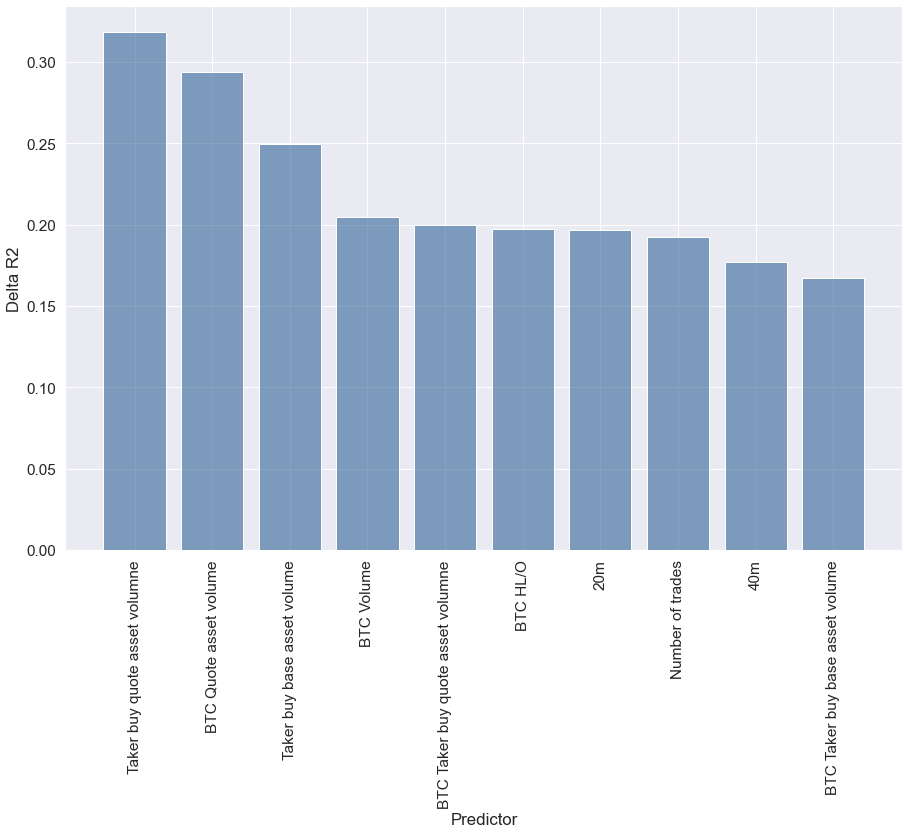

In [213]:
plt.figure(figsize=(15, 10))
plt.rcParams.update({'font.size': 16})
plt.bar(delta_r2_df.iloc[:10, :]['Predictor'], 
        delta_r2_df.iloc[:10, :]['Delta R2'], 
        color=(0.2, 0.4, 0.6, 0.6), zorder=3)

plt.xlabel('Predictor')
plt.ylabel('Delta R2')
plt.xticks(delta_r2_df.iloc[:10, :]['Predictor'])
plt.xticks(rotation=90)
plt.grid(True, zorder=0)

plt.show()